# Introduction

Brain tumors are a significant health concern worldwide, often requiring accurate and timely diagnosis for effective treatment. With the advent of deep learning techniques, particularly convolutional neural networks (CNNs), there has been considerable progress in automating the detection and classification of brain tumors from medical images such as Magnetic Resonance Imaging (MRI) scans. However, the computational complexity associated with processing high-dimensional medical images poses challenges, especially in real-time applications.

To address this challenge, this project proposes a novel approach that combines the power of autoencoders with CNNs for brain tumor detection and classification. Autoencoders, a type of neural network commonly used for unsupervised learning tasks, excel in dimensionality reduction by learning a compressed representation of the input data. By leveraging the reconstructed images from the autoencoder as inputs to a CNN, we aim to significantly reduce the computational load while preserving essential features for accurate classification.

The dataset used in this project consists of MRI scans with four classes of tumors: 'no_tumor', 'glioma_tumor', 'meningioma_tumor', and 'pituitary_tumor'. Our objective is to train a hybrid model that utilizes an autoencoder for preprocessing followed by a CNN for multiclass classification. The reconstructed images generated by the autoencoder serve as a lower-dimensional representation of the original MRI scans, effectively reducing the input size for the subsequent CNN model.

This innovative approach not only streamlines the computational requirements but also holds promise for improving the efficiency and accuracy of brain tumor classification systems. By integrating autoencoder-based dimensionality reduction with CNN-based classification, we aim to contribute to the advancement of automated medical image analysis, ultimately facilitating early detection and treatment of brain tumors.

# Data Loading and Preprocessing
Data is loaded from the specified directories, where each subfolder represents a class label. The images are resized to a consistent dimension and normalized:

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



def load_data(directory):
    images = []
    labels = []
    label_dict = {'no_tumor': 0, 'glioma_tumor': 1, 'meningioma_tumor': 2, 'pituitary_tumor': 3}
    
    for label in os.listdir(directory):
        class_folder = os.path.join(directory, label)
        if os.path.isdir(class_folder):
            for image_filename in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_filename)
                image = load_img(image_path, target_size=(224, 224))
                image = img_to_array(image)
                images.append(image)
                labels.append(label_dict[label])
    
    return np.array(images), np.array(labels)


# Autoencoder Architecture for Dimensionality Reduction
The following describes the architecture of an autoencoder implemented using TensorFlow and Keras. This autoencoder is designed to reduce the dimensionality of 224x224 pixel brain tumor images, facilitating a lower-dimensional representation for further processing and classification by a convolutional neural network (CNN).

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape

input_img = Input(shape=(224, 224, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Encoder Model
encoder = Model(input_img, encoded)

# Autoencoder Training with Early Stopping

Load and normalize brain tumor image data from specified directories. Use early stopping during autoencoder training to prevent overfitting, halting if validation loss doesn't improve for three epochs. Set training for 15 epochs with a batch size of 256, using the same data for validation.

In [3]:
train_images, train_labels = load_data("Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Training")
test_images, test_labels = load_data("Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Testing")

# Normalizing the data if not already done
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the autoencoder with early stopping
autoencoder.fit(train_images, train_images, epochs=15, batch_size=256, shuffle=True, 
                validation_data=(train_images, train_images), callbacks=[early_stopping])


Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 150s 11s/step - loss: 0.1292 - val_loss: 0.0988
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 357s 29s/step - loss: 0.0902 - val_loss: 0.0484
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 144s 10s/step - loss: 0.0355 - val_loss: 0.0174
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 199s 10s/step - loss: 0.0169 - val_loss: 0.0152
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 146s 11s/step - loss: 0.0144 - val_loss: 0.0111
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 137s 10s/step - loss: 0.0100 - val_loss: 0.0075
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 148s 11s/step - loss: 0.0072 - val_loss: 0.0063
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 133s 9s/step - loss: 0.0061 - val_loss: 0.0054
Epoch 9/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 170s 12s/step - loss: 0.0052 - val_loss: 0.0046
Epoch 10/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 127s 9s/step - loss: 0.0042 - val_loss: 0.0036
Epoch 11/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 140s 10s/step - loss: 0.0036 - val_loss: 0.0033
Epoch 12/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 138s 10s/step -

# Saving the Autoencoder

In [21]:
autoencoder.save("dimensionality_reduction_model.h5")

# Visualizing Encoded Images

Visualize the first channel of encoded brain tumor images from both training and testing sets. The visualization function plots the first five samples, displaying how the encoder model compresses image features, which is critical for understanding feature extraction effectiveness in autoencoders.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


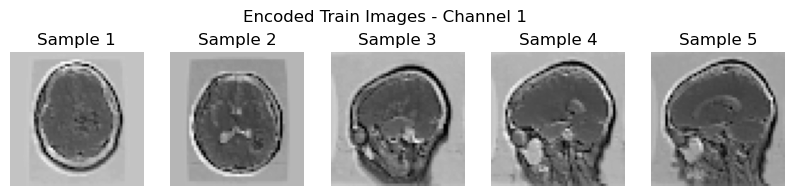

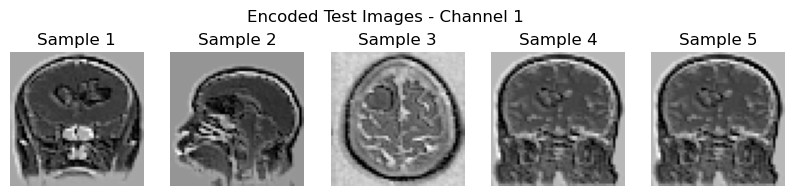

In [4]:
# Assuming 'encoder' is your encoder model and 'train_images', 'test_images' are already loaded and preprocessed
n_samples = 5 # Number of samples to visualize

encoded_train_images = encoder.predict(train_images[:n_samples])
encoded_test_images = encoder.predict(test_images[:n_samples])

import matplotlib.pyplot as plt

def plot_encoded_images(encoded_images, title):
    plt.figure(figsize=(10, 4))
    for i in range(n_samples):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(encoded_images[i, :, :, 0], cmap='gray')  # Visualizing the first channel
        plt.title(f"Sample {i + 1}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot encoded train images
plot_encoded_images(encoded_train_images, "Encoded Train Images - Channel 1")

# Plot encoded test images
plot_encoded_images(encoded_test_images, "Encoded Test Images - Channel 1")